In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# **Generating synthetic dataset**

In [ ]:
n_samples = 500

# Generate random values for x and y in the range [-100, 100]
x = np.random.randint(-100, 100, n_samples)
y = np.random.randint(-100, 100, n_samples)

# Define classification logic based on the values of x and y
def classify(x, y):
    if y < x - 80:
        return 4
    elif x - 80 < y < x - 40:
        return 0
    elif x - 40 < y < x:
        return 1
    elif x < y < x + 40:
        return 2
    elif y > x + 40:
        return 3

# Apply the classification logic to generate labels
labels = [classify(x[i], y[i]) for i in range(n_samples)]

# Create a DataFrame with columns 'x', 'y', and 'label'
df = pd.DataFrame({'x': x, 'y': y, 'label': labels})

# Save the DataFrame to a CSV file
df.to_csv('random_data.csv', index=False)

# Display the first few rows of the dataset
print(df)

      x   y  label
0    80  51    1.0
1   -40 -57    1.0
2   -34  23    3.0
3    35  73    2.0
4    29 -23    0.0
..   ..  ..    ...
495 -93  19    3.0
496 -57 -19    2.0
497  38 -59    4.0
498 -14  27    3.0
499 -76 -56    2.0

[500 rows x 3 columns]


In [ ]:
X1 = df["x"].values.tolist()
X2 = df["y"].values.tolist()
Y = df["label"].values.tolist()

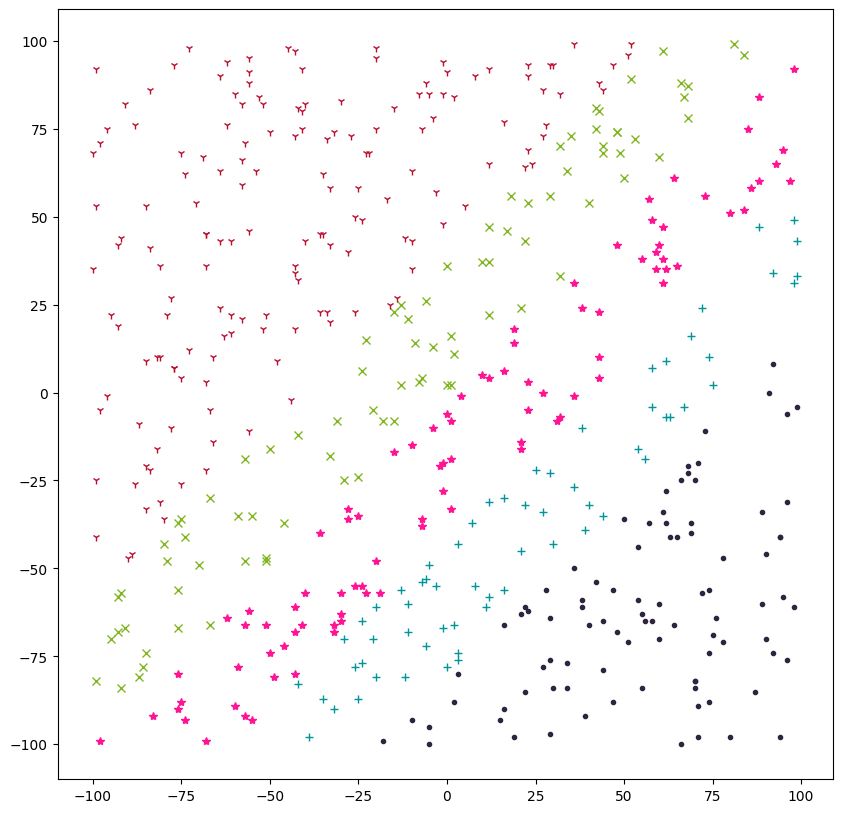

In [ ]:
plt.figure(figsize=(10,10))
for i in range(len(Y)):
    if Y[i] == 0:
        plt.plot(X1[i], X2[i], c="#01949a", marker="+")
    elif Y[i] == 1:
        plt.plot(X1[i], X2[i], c="#FF1493", marker="*")
    elif Y[i] == 2:
        plt.plot(X1[i], X2[i], c="#81b622", marker="x")
    elif Y[i] == 3:
        plt.plot(X1[i], X2[i], c="#ba0f30", marker="1")
    elif Y[i] == 4:
        plt.plot(X1[i], X2[i], c="#2f2440", marker=".")
plt.show()

In [ ]:
# function normalization
def normalize(input):
    output = [0] * 5  # Initialize a list of five zeros
    for i in range(5):
        if i == input:
            output[i] = 1
    return output

In [ ]:
# Combining the two input features into a list of tuples
points = list(zip(X1, X2))

# Converting the list of tuples into a NumPy array
points_np = np.array(points)

In [ ]:
# Normalizing and converting into a NumPy array
labels = np.array([normalize(label) for label in Y])

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
point_train, point_test, labels_train, labels_test = train_test_split(
    points_np, labels, test_size=0.25, random_state=20
)


# **NN training and testing**

In [ ]:
class NeuralNetwork:
    def __init__(self, input_neurons=2, hidden1_neurons=20, hidden2_neurons=20, hidden3_neurons=20, output_neurons=5, learning_rate=0.01, activation_type='sigmoid'):
        self.learning_rate = learning_rate
        self.activation_type = activation_type

        # Initialize weights
        self.weights = [
            np.random.randn(input_neurons, hidden1_neurons),
            np.random.randn(hidden1_neurons, hidden2_neurons),
            np.random.randn(hidden2_neurons, hidden3_neurons),
            np.random.randn(hidden3_neurons, output_neurons)
        ]

        # Initialize bias
        self.biases = [
            np.random.randn(hidden1_neurons),
            np.random.randn(hidden2_neurons),
            np.random.randn(hidden3_neurons),
            np.random.randn(output_neurons)
        ]

    def _activation(self, x, derivative=False):
        #Apply the selected activation function and its derivative.
        if self.activation_type == 'sigmoid':
            if derivative:
                return np.exp(-x) / (1 + np.exp(-x))**2
            return 1 / (1 + np.exp(-x))

        elif self.activation_type == 'tanh':
            if derivative:
                return 1 - np.tanh(x)**2
            return np.tanh(x)

        elif self.activation_type == 'relu':
            if derivative:
                return np.where(x > 0, 1, 0)
            return np.maximum(0, x)

        elif self.activation_type == 'gaussian':
            if derivative:
                return -2 * x * np.exp(-x**2)
            return np.exp(-x**2)

    def _feed_forward_layer(self, input_data, weights, bias):
        return self._activation(np.dot(input_data, weights) + bias)  #Perform feedforward for a single layer.

    def feed_forward(self, X):
        #Feedforward pass through all layers.
        self.hidden1_output = self._feed_forward_layer(X, self.weights[0], self.biases[0])
        self.hidden2_output = self._feed_forward_layer(self.hidden1_output, self.weights[1], self.biases[1])
        self.hidden3_output = self._feed_forward_layer(self.hidden2_output, self.weights[2], self.biases[2])
        self.output = self._feed_forward_layer(self.hidden3_output, self.weights[3], self.biases[3])
        return self.output

    def _compute_deltas(self, error, output, derivative=True):
        #Compute deltas for backpropagation.
        return self.learning_rate * error * self._activation(output, derivative)

    def back_propagation(self, X, Y):
        #Perform backpropagation to update weights and biases.
        output_error = Y - self.output
        output_delta = self._compute_deltas(output_error, self.output)

        hidden3_error = output_delta.dot(self.weights[3].T)
        hidden3_delta = self._compute_deltas(hidden3_error, self.hidden3_output)

        hidden2_error = hidden3_delta.dot(self.weights[2].T)
        hidden2_delta = self._compute_deltas(hidden2_error, self.hidden2_output)

        hidden1_error = hidden2_delta.dot(self.weights[1].T)
        hidden1_delta = self._compute_deltas(hidden1_error, self.hidden1_output)

        # Update weights
        self.weights[0] += X.T.dot(hidden1_delta)
        self.weights[1] += self.hidden1_output.T.dot(hidden2_delta)
        self.weights[2] += self.hidden2_output.T.dot(hidden3_delta)
        self.weights[3] += self.hidden3_output.T.dot(output_delta)

        # Update biases
        self.biases[0] += np.sum(hidden1_delta, axis=0)
        self.biases[1] += np.sum(hidden2_delta, axis=0)
        self.biases[2] += np.sum(hidden3_delta, axis=0)
        self.biases[3] += np.sum(output_delta, axis=0)

    #Train the neural network by performing feedforward and backpropagation.
    def train(self, X, Y):
        self.feed_forward(X)
        self.back_propagation(X, Y)


Epoch: 0, Error: 0.172228850405396
Epoch: 1000, Error: 0.07939431347203721
Epoch: 2000, Error: 0.07354174047424183
Epoch: 3000, Error: 0.07083647897945722
Epoch: 4000, Error: 0.06908615488534209
Epoch: 5000, Error: 0.06778491335867406
Epoch: 6000, Error: 0.0667620834327069
Epoch: 7000, Error: 0.0659343599674046
Epoch: 8000, Error: 0.06524598909797275
Epoch: 9000, Error: 0.06465363598576135


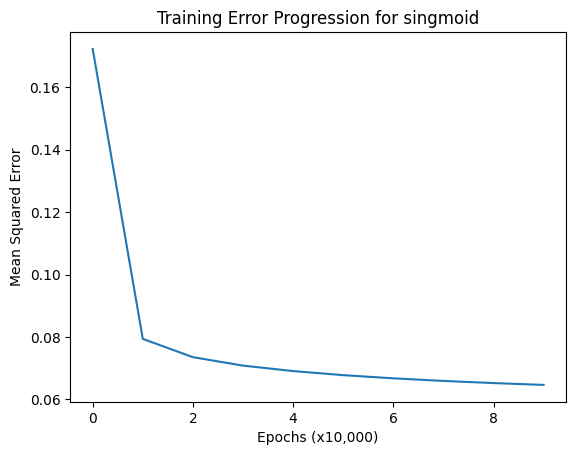

In [ ]:
# Initialize the neural network with 'sigmoid' activation function
NN = NeuralNetwork(activation_type='sigmoid')

error_log = []

# Train the neural network for 10000 epochs
for epoch in range(10000):
    NN.train(point_train, labels_train)  # Train the model with training data
    error = np.mean(np.square(labels_train - NN.feed_forward(point_train)))  # Calculate mean squared error

    # Log the error every 1000 epochs
    if epoch % 1000 == 0:
        error_log.append(error)
        print(f'Epoch: {epoch}, Error: {error}')

# Plot the error log
plt.plot(error_log)
plt.xlabel("Epochs (x10,000)")
plt.ylabel("Mean Squared Error")
plt.title("Training Error Progression for singmoid")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns

Epoch: 0, Error: 0.19626666666666667
Epoch: 1000, Error: 0.19626666666666667
Epoch: 2000, Error: 0.19626666666666667
Epoch: 3000, Error: 0.19626666666666667
Epoch: 4000, Error: 0.19626666666666667
Epoch: 5000, Error: 0.19626666666666667
Epoch: 6000, Error: 0.19626666666666667
Epoch: 7000, Error: 0.19626666666666667
Epoch: 8000, Error: 0.19626666666666667
Epoch: 9000, Error: 0.19626666666666667


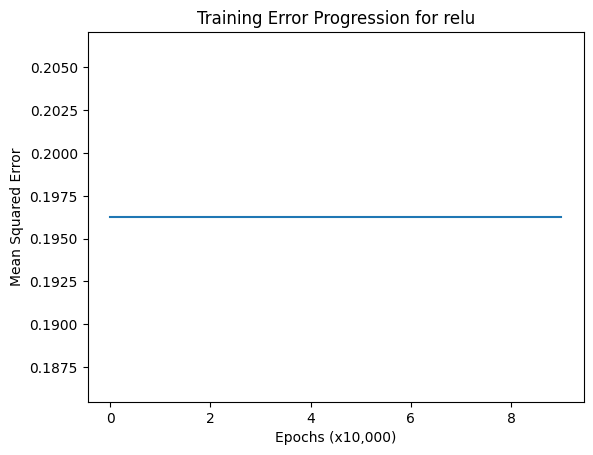

In [ ]:
# Initialize the neural network with 'sigmoid' activation function
NN = NeuralNetwork(activation_type='relu')

error_log = []

# Train the neural network for 10000 epochs
for epoch in range(10000):
    NN.train(point_train, labels_train)  # Train the model with training data
    error = np.mean(np.square(labels_train - NN.feed_forward(point_train)))  # Calculate mean squared error

    # Log the error every 1000 epochs
    if epoch % 1000 == 0:
        error_log.append(error)
        print(f'Epoch: {epoch}, Error: {error}')

# Plot the error log
plt.plot(error_log)
plt.xlabel("Epochs (x10,000)")
plt.ylabel("Mean Squared Error")
plt.title("Training Error Progression for relu")
plt.show()

Epoch: 0, Error: 0.9221358089342613
Epoch: 1000, Error: 0.30784800175434507
Epoch: 2000, Error: 0.3055079609182894
Epoch: 3000, Error: 0.30564815892237723
Epoch: 4000, Error: 0.30644724679138624
Epoch: 5000, Error: 0.3044271107675907
Epoch: 6000, Error: 0.31238898633474393
Epoch: 7000, Error: 0.31259366052482795
Epoch: 8000, Error: 0.315808000677385
Epoch: 9000, Error: 0.30820568767157913


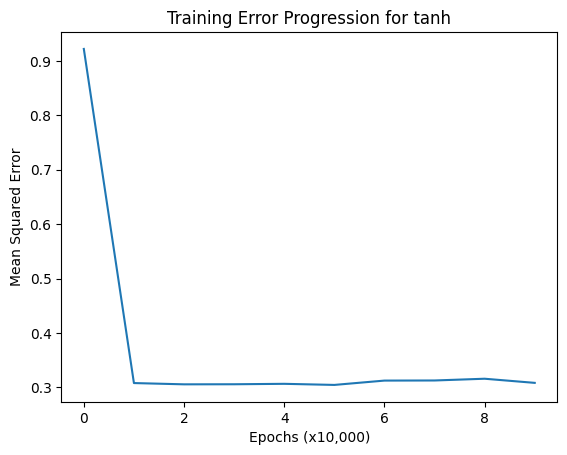

In [ ]:
# Initialize the neural network with 'sigmoid' activation function
NN = NeuralNetwork(activation_type='tanh')

error_log = []

# Train the neural network for 10000 epochs
for epoch in range(10000):
    NN.train(point_train, labels_train)  # Train the model with training data
    error = np.mean(np.square(labels_train - NN.feed_forward(point_train)))  # Calculate mean squared error

    # Log the error every 1000 epochs
    if epoch % 1000 == 0:
        error_log.append(error)
        print(f'Epoch: {epoch}, Error: {error}')

# Plot the error log
plt.plot(error_log)
plt.xlabel("Epochs (x10,000)")
plt.ylabel("Mean Squared Error")
plt.title("Training Error Progression for tanh")
plt.show()

Epoch: 0, Error: 0.21241712617468356
Epoch: 1000, Error: 0.186399423695914
Epoch: 2000, Error: 0.1827378594350609
Epoch: 3000, Error: 0.1823365025269841
Epoch: 4000, Error: 0.18381370935168337
Epoch: 5000, Error: 0.18471231357935863
Epoch: 6000, Error: 0.18355280272924676
Epoch: 7000, Error: 0.18557498324296587
Epoch: 8000, Error: 0.1855942406805072
Epoch: 9000, Error: 0.18629234743857098


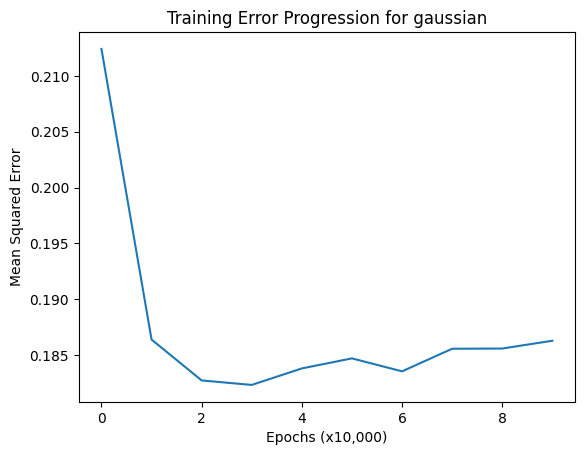

In [ ]:
# Initialize the neural network with 'sigmoid' activation function
NN = NeuralNetwork(activation_type='gaussian')

error_log = []

# Train the neural network for 10000 epochs
for epoch in range(10000):
    NN.train(point_train, labels_train)  # Train the model with training data
    error = np.mean(np.square(labels_train - NN.feed_forward(point_train)))  # Calculate mean squared error

    # Log the error every 1000 epochs
    if epoch % 1000 == 0:
        error_log.append(error)
        print(f'Epoch: {epoch}, Error: {error}')

# Plot the error log
plt.plot(error_log)
plt.xlabel("Epochs (x10,000)")
plt.ylabel("Mean Squared Error")
plt.title("Training Error Progression for gaussian")
plt.show()

In [ ]:
#Convert prediction probabilities to a dictionary with percentage values.
def get_prob(pred):
    return {f'Class-{i}': prob * 100 for i, prob in enumerate(pred)}

#Return the class with the highest probability.
def get_class(prob_dict):
    return max(prob_dict, key=prob_dict.get)

In [ ]:
pred = NN.feed_forward([56,55])
print(pred)
print(get_prob(pred))
print(get_class(get_prob(pred)))

[1.06441644e-01 1.10480397e-42 7.00327972e-02 1.54122077e-23
 5.36424761e-16]
{'Class-0': 10.64416437518942, 'Class-1': 1.104803965935285e-40, 'Class-2': 7.003279717525575, 'Class-3': 1.5412207714546533e-21, 'Class-4': 5.364247611607041e-14}
Class-0


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns

# **Calculating accuracy, precision, recall, f1 score**

In [ ]:
# Get predictions from the neural network on the test data
predictions = NN.feed_forward(point_test)

# Convert one-hot encoded labels and predictions to class labels
true_labels = np.argmax(labels_test, axis=1)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Overall Accuracy: {accuracy:.4f}")

# Calculate precision for each class
precision = precision_score(true_labels, predicted_labels, average=None)
print("Precision for each class:")
for i, score in enumerate(precision):
    print(f"Class {i}: {score:.4f}")

# Calculate macro recall and F1 score
recall = recall_score(true_labels, predicted_labels, average='macro')
print(f"Recall (macro): {recall:.4f}")

f1 = f1_score(true_labels, predicted_labels, average='macro')
print(f"F1 Score (macro): {f1:.4f}")

# Calculate F1 score for each class
f1_scores_per_class = f1_score(true_labels, predicted_labels, average=None)

# Print F1 scores for each class
print("F1 Scores for each class:")
for i, score in enumerate(f1_scores_per_class):
    print(f"Class {i}: {score:.4f}")

Overall Accuracy: 0.0960
Precision for each class:
Class 0: 0.1237
Class 1: 0.0000
Class 2: 0.0000
Class 3: 0.0000
Class 4: 0.0000
Recall (macro): 0.1500
F1 Score (macro): 0.0425
F1 Scores for each class:
Class 0: 0.2124
Class 1: 0.0000
Class 2: 0.0000
Class 3: 0.0000
Class 4: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Confusion Matrix**

Confusion Matrix:
[[12  0  4  0  0]
 [17  0  7  0  0]
 [17  0  0  0  0]
 [33  0 11  0  2]
 [18  0  4  0  0]]


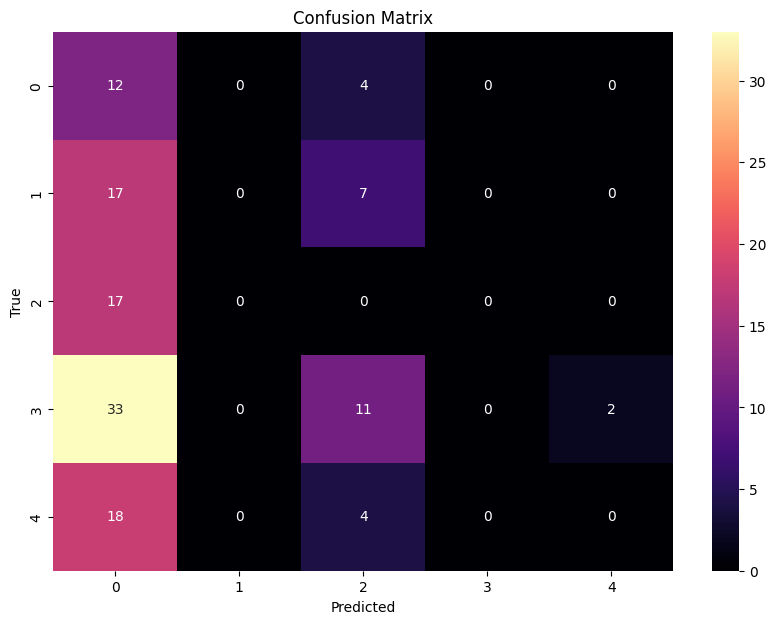

In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='magma')  # Adjust 'magma' to your preferred colormap
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **ROC curve generating**

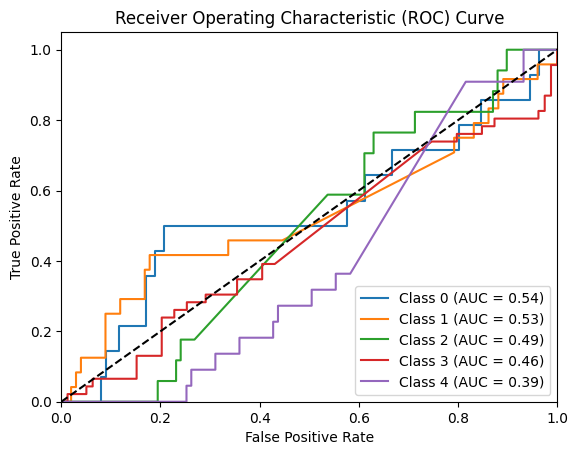

In [ ]:
# Calculate ROC metrics for each class
false_positive_rate = dict()
true_positive_rate = dict()
roc_auc_score = dict()

num_classes = labels_test.shape[1]  # Assuming labels_test is a 2D array

for class_index in range(num_classes):
    false_positive_rate[class_index], true_positive_rate[class_index], _ = roc_curve(labels_test[:, class_index], predictions[:, class_index])
    roc_auc_score[class_index] = auc(false_positive_rate[class_index], true_positive_rate[class_index])

# Plot ROC curve for each class
for class_index in range(num_classes):
    plt.plot(false_positive_rate[class_index], true_positive_rate[class_index], label=f'Class {class_index} (AUC = {roc_auc_score[class_index]:.2f})')

# Plot the diagonal line for random predictions
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



# **Changing parameters and observing**

Epoch: 0, Error: 0.18613404815827703
Epoch: 1000, Error: 0.18645182537746993
Epoch: 2000, Error: 0.18690896413170927
Epoch: 3000, Error: 0.18698486117620403
Epoch: 4000, Error: 0.186896143071872
Epoch: 5000, Error: 0.1868564743312352
Epoch: 6000, Error: 0.18758026202985126
Epoch: 7000, Error: 0.18762330650383435
Epoch: 8000, Error: 0.18641399831436123
Epoch: 9000, Error: 0.18623161673264713


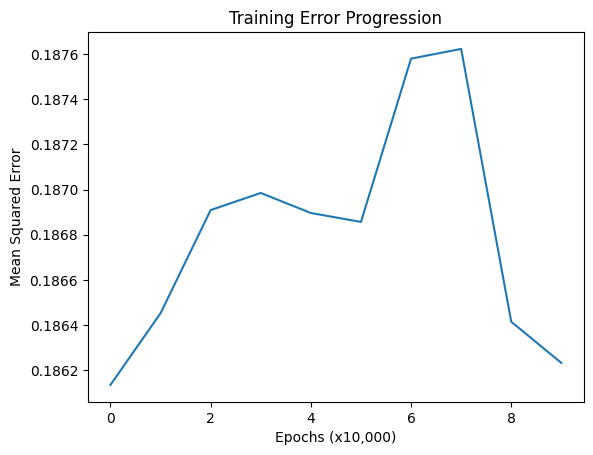

In [ ]:
NN_1 = NeuralNetwork(input_neurons=2, hidden1_neurons=50, hidden2_neurons=50, hidden3_neurons=20, output_neurons=5, learning_rate=0.001, activation_type='sigmoid')

error_log = []

# Train the neural network for 10000 epochs
for epoch in range(10000):
    NN.train(point_train, labels_train)  # Train the model with training data
    error = np.mean(np.square(labels_train - NN.feed_forward(point_train)))  # Calculate mean squared error

    # Log the error every 1000 epochs
    if epoch % 1000 == 0:
        error_log.append(error)
        print(f'Epoch: {epoch}, Error: {error}')

# Plot the error log
plt.plot(error_log)
plt.xlabel("Epochs (x10,000)")
plt.ylabel("Mean Squared Error")
plt.title("Training Error Progression")
plt.show()

In [ ]:
# Get predictions from the neural network on the test data
predictions1 = NN.feed_forward(point_test)

# Convert one-hot encoded labels and predictions to class labels
true_labels1 = np.argmax(labels_test, axis=1)
predicted_labels1 = np.argmax(predictions1, axis=1)

Confusion Matrix:
[[ 4  0 11  0  1]
 [10  0 14  0  0]
 [ 3  0 14  0  0]
 [16  0 29  0  1]
 [ 3  0 19  0  0]]


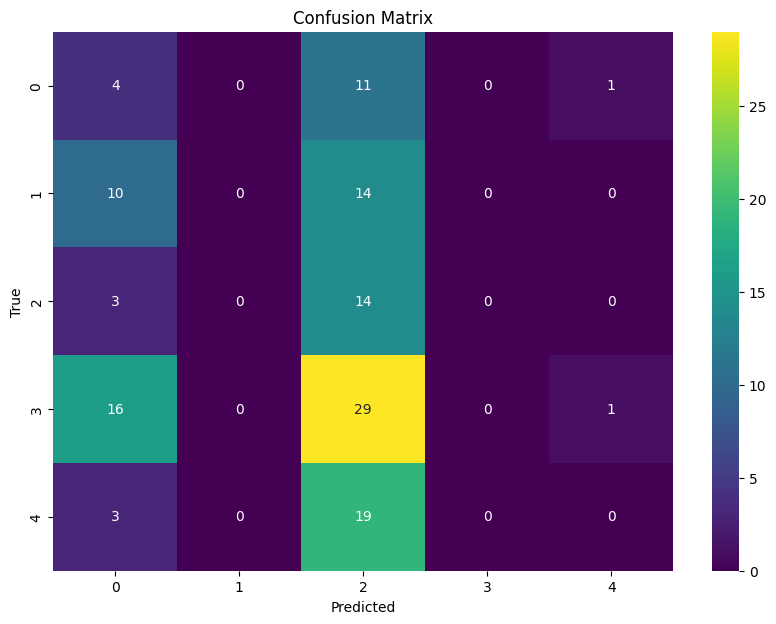

In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels1, predicted_labels1)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis')  # Adjust 'viridis' to your preferred colormap
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

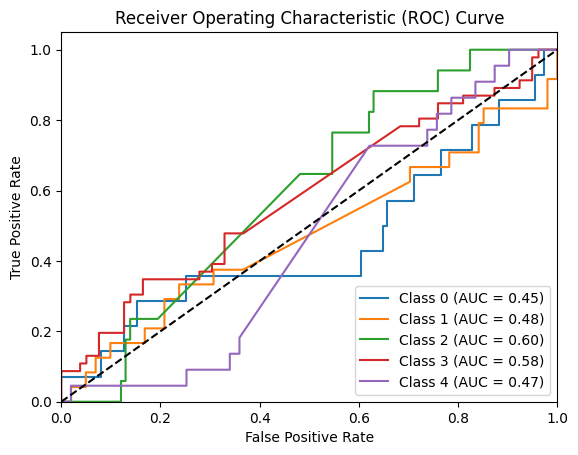

In [ ]:
# Calculate ROC metrics for each class
false_positive_rate = dict()
true_positive_rate = dict()
roc_auc_score = dict()

num_classes = labels_test.shape[1]  # Assuming labels_test is a 2D array

for class_index in range(num_classes):
    false_positive_rate[class_index], true_positive_rate[class_index], _ = roc_curve(labels_test[:, class_index], predictions1[:, class_index])
    roc_auc_score[class_index] = auc(false_positive_rate[class_index], true_positive_rate[class_index])

# Plot ROC curve for each class
for class_index in range(num_classes):
    plt.plot(false_positive_rate[class_index], true_positive_rate[class_index], label=f'Class {class_index} (AUC = {roc_auc_score[class_index]:.2f})')

# Plot the diagonal line for random predictions
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(true_labels1, predicted_labels1)
print(f"Overall Accuracy: {accuracy:.4f}")

# Calculate precision for each class
precision = precision_score(true_labels1, predicted_labels1, average=None)
print("Precision for each class:")
for i, score in enumerate(precision):
    print(f"Class {i}: {score:.4f}")

# Calculate macro recall and F1 score
recall = recall_score(true_labels1, predicted_labels1, average='macro')
print(f"Recall (macro): {recall:.4f}")

f1 = f1_score(true_labels1, predicted_labels1, average='macro')
print(f"F1 Score (macro): {f1:.4f}")

# Calculate F1 score for each class
f1_scores_per_class = f1_score(true_labels1, predicted_labels1, average=None)

# Print F1 scores for each class
print("F1 Scores for each class:")
for i, score in enumerate(f1_scores_per_class):
    print(f"Class {i}: {score:.4f}")

Overall Accuracy: 0.1440
Precision for each class:
Class 0: 0.1111
Class 1: 0.0000
Class 2: 0.1609
Class 3: 0.0000
Class 4: 0.0000
Recall (macro): 0.2147
F1 Score (macro): 0.0846
F1 Scores for each class:
Class 0: 0.1538
Class 1: 0.0000
Class 2: 0.2692
Class 3: 0.0000
Class 4: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
